In [1]:
import pandas as pd
import numpy as np
import json
import requests
from tweepy import OAuthHandler
import csv, re
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering Data

In [2]:
# load tweeter archive
archive=pd.read_csv('/Users/yc28/Desktop/Coding/Udacity_DA/project3/twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# load tweet image prediction from url
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url = URL)
prediction=r.content

In [4]:
# Convert bytes from prediction file to csv
data = prediction.decode('utf-8').splitlines()
with open("tmp.csv", "w") as csv_file:
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        writer.writerow(re.split('\s+',line))

image_prediction=pd.read_csv('tmp.csv',sep='\t')

Reference: https://stackoverflow.com/questions/51089194/python-convert-bytes-unicode-tab-delimited-data-to-csv-file

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key='HIDDEN'
consumer_secret='HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
tweet_ids = archive.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError:
            pass

In [10]:
# Convert txt file to json
tweets_list = []
for line in open('tweet_json.txt', 'r'):
    tweets_list.append(json.loads(line))    
    

# Convert json file to dataframe (method 1)
ids=[]
retweet_count=[]
favorite_count=[]
for data in tweets_list:
    ids.append(data['id'])
    retweet_count.append(data['retweet_count'])
    favorite_count.append(data['favorite_count'])
    
    
retweet_fav_df=pd.DataFrame({'tweet_id':ids,'retweet':retweet_count,'favorite':favorite_count})
retweet_fav_df.head()


# Convert json file to dataframe (method 2)
#tlist=[]
#tweet_dict={}

#for data in tweets_list:
#    tweet_dict['ID']=data['id']
#    tweet_dict['retweet']=data['retweet_count']
#    tweet_dict['favorite']=data['favorite_count']
#    tlist.append(tweet_dict)
    
    
#retweet_fav_df=pd.DataFrame(tlist)

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
### This section will be focused on assessing the quality and tidiness issues for the above three datasets.

- High quality data should have the following attributes:

  1) Completeness

  2) Validity

  3) Accuracy

  4) Consistency

    
- Tidy data should fulfil the following requirements:

  1) Each variable forms a column.

  2) Each observation forms a row.

  3) Each type of observational unit forms a table.

**<p>&#9658; archive</p>**

In [11]:
# Overview of archive dataframe
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# Check rows and columns 
archive.shape

(2356, 17)

In [13]:
# Check all data types and missing values in the columns
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# check if denominators are all 10
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# Check if there are any tweets later than Aug 1, 2017
archive.sort_values('timestamp', ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
# Check any other null values
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# Check distribution of rating numerators
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

- Remove 181 tweets that are retweets of the originals
- Remove 78 tweets that are in reply of the originals
- Exclude all rows where rating denominator is > 10. Any denominator > 10 is considered invalid based on current rating system.
- Remove rows where rating numerator is > 20 as these are outliers that would not help us visualise overall dataset
- Any columns that are irrelevant to this analysis should be removed.

**<p>&#9658; image_prediction</p>**

In [18]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_prediction.shape

(2075, 12)

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Delete rows where p1_dog, p2_dog and p3_dog are all False
image_prediction[(image_prediction.p1_dog==False)&(image_prediction.p2_dog==False)&(image_prediction.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [22]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

- Delete rows where p1_dog, p2_dog and p3_dog are all False
- Determine the dog breed by selecting the prediction with the highest confidence level, and delete the rest of the predicted values
- Exclude any tweet IDs that do not exist in the archive file

**<p>&#9658; retweet_fav_df</p>**

In [23]:
retweet_fav_df.head()

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
retweet_fav_df.shape

(2354, 3)

In [25]:
retweet_fav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null int64
retweet     2354 non-null int64
favorite    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
retweet_fav_df.isnull().sum()

tweet_id    0
retweet     0
favorite    0
dtype: int64

After merging the dataset:

- Delete any tweet IDs that do not have image jpg url, breed, retweet or favorite counts
- Drop any rows with NAs

### Clean-up Procedure Summary


**<p>&#9658; Archive:**<p>

- Remove 181 tweets that are retweets of the originals
- Remove 78 tweets that are in reply of the originals
- Exclude all rows where rating denominator is > 10. Any denominator > 10 is considered invalid based on current rating system.
- Remove rows wheere rating numerator is > 20 as these are outliers that would not help us visualise overall dataset
- Any columns that are irrelevant to this analysis should be removed.
    

**<p>&#9658; image_prediction:**<p>
- Delete rows where p1_dog, p2_dog and p3_dog are all False
- Determine the dog breed by selecting the prediction with the highest confidence level, and delete the rest of the predicted values
- Exclude any tweet IDs that do not exist in the archive file


**<p>&#9658; After merging:**<p>
- Delete any tweet IDs that do not have image, jpg url, breed, retweet or favorite counts
- Drop any rows with NaNs

## Cleaning Data

In [ ]:
# Make copies of original data before cleaning

In [27]:
archive_copy=archive.copy()

In [29]:
image_prediction_copy=image_prediction.copy()

In [30]:
# archive: remove retweet rows by excluding rows where retweeted_status_id has number
archive_clean=archive[archive_copy.retweeted_status_id.isnull()]

In [31]:
# verify no retweets in the dataset
archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [32]:
archive_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [33]:
archive_clean.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

In [34]:
# archive: remove retweet rows by excluding rows where in_reply_to_status_id has number
archive_clean=archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
# verify no tweets are inreply to other tweets
archive_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [36]:
# archive: delete rows where rating_denominator is >10
archive_clean=archive_clean[archive_clean.rating_denominator ==10]

In [37]:
# verify all values in column rating_denominator is 10
archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

In [38]:
# archive: delete rows where rating_numerator is >20
archive_clean=archive_clean[archive_clean.rating_numerator <=20]

In [39]:
# Verify there is no rating numerator > 20
archive_clean[archive_clean.rating_numerator >20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
# archive: Remove unnecessary columns
archive_clean=archive_clean.filter(items=['tweet_id',
                                            'timestamp',
                                            'rating_numerator',
                                             'rating_denominator',
                                            'name'])
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin


In [41]:
# Exclude rows where dog breed predictions (p1_dog,p2_dog,p3_dog) are not dogs 
not_dog_df=image_prediction_copy[(image_prediction_copy.p1_dog==False)&(image_prediction_copy.p2_dog==False)&(image_prediction_copy.p3_dog==False)]
image_prediction_clean=image_prediction_copy[~image_prediction_copy.index.isin(not_dog_df.index)]
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
# Verify 
image_prediction_clean[(image_prediction_clean.p1_dog==False)&(image_prediction_clean.p2_dog==False)&(image_prediction_clean.p3_dog==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
# image_prediction: only keep one dog breed data per row and delete rest of the prediction data
breed_list=[]

for row in image_prediction_clean.index.values:
    if image_prediction_clean.p1_dog[row]==True:
        breed_list.append(image_prediction_clean.p1[row])
    elif image_prediction_clean.p2_dog[row]==True:
        breed_list.append(image_prediction_clean.p2[row])
    elif image_prediction_clean.p3_dog[row]==True:
        breed_list.append(image_prediction_clean.p3[row])
    else:
        breed_list.append('Error')

        
        
image_prediction_clean['breed']=breed_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [44]:
# Verify there is no 'error' dog breed
image_prediction_clean[image_prediction_clean.breed=='Error']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed


In [45]:
# Clear all unnecessary columns
image_prediction_clean = image_prediction_clean.filter(items=['tweet_id',
                                                             'jpg_url',
                                                             'img_num',
                                                             'breed'])

image_prediction_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


In [46]:
# left join archive_clean and image_prediction_clean on tweet_id to exclude tweet ids in image_predication that do not exist in archive
archive_image=pd.merge(archive_clean,image_prediction_clean,how='left',on='tweet_id')
archive_image.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset


In [47]:
# Delete any rows that do not have jpg_url
no_image=archive_image[archive_image.jpg_url.isnull()]
archive_image_clean=archive_image[~archive_image.index.isin(no_image.index)]

In [48]:
# Verify
archive_image_clean[archive_image_clean.jpg_url.isnull()]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,jpg_url,img_num,breed


In [49]:
# Join archive_image_clean with retweet_fav_df
final_df=pd.merge(archive_image_clean,retweet_fav_df,how='left',on='tweet_id')
final_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,retweet,favorite
0,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17 +0000,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,3261,20562


In [50]:
# Drop any rows with NaNs 
final_df.dropna(inplace=True)

In [51]:
# Verify all NaN have been removed
final_df.isnull().any().any()

False

In [52]:
final_df.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visualization

Text(0.5,1,'Top 5 Most Tweeted Dogs by Breed')

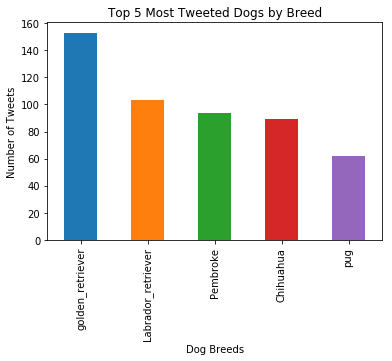

In [53]:
# Top 5 dog breeds that were tweeted
final_df.breed.value_counts()[:5].plot(kind='bar')
plt.xlabel('Dog Breeds')
plt.ylabel('Number of Tweets')
plt.title('Top 5 Most Tweeted Dogs by Breed')

In [54]:
# top 10 highest average rating score by breeds
final_df.groupby('breed').mean().sort_values('rating_numerator', ascending=False)[:10]

,tweet_id,rating_numerator,rating_denominator,img_num,retweet,favorite
breed,,,,,,
Bouvier_des_Flandres,8.612885e+17,13.000000,10.0,1.000000,4479.000000,18032.000000
Saluki,8.315403e+17,12.500000,10.0,1.000000,5133.750000,24060.000000
briard,7.700369e+17,12.333333,10.0,2.000000,2966.666667,9511.666667
Tibetan_mastiff,7.534455e+17,12.250000,10.0,1.000000,4193.000000,12173.500000
Border_terrier,7.933788e+17,12.142857,10.0,1.000000,3377.142857,13578.000000
silky_terrier,7.737047e+17,12.000000,10.0,2.000000,1891.000000,7317.000000
standard_schnauzer,6.757109e+17,12.000000,10.0,2.000000,928.000000,2046.000000
Gordon_setter,7.298867e+17,11.750000,10.0,1.250000,2495.500000,5529.250000
Irish_setter,7.745175e+17,11.750000,10.0,1.000000,3374.000000,10581.750000


Text(0.5,1,'Correlation between Rating Score and Number of Retweets/Likes')

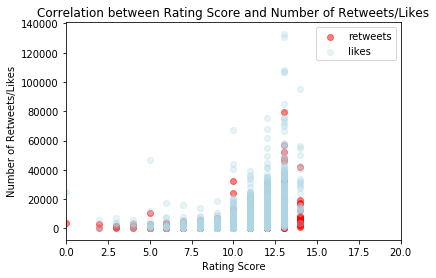

In [55]:
# Correlation between rating score and the number of retweets & likes
plt.scatter(final_df['rating_numerator'],final_df['retweet'],color='red',alpha=0.5, label='retweets')
plt.scatter(final_df['rating_numerator'],final_df['favorite'],color='lightblue',alpha=0.3,label='likes')
plt.legend()
plt.xlim([0,20])
plt.xlabel('Rating Score')
plt.ylabel('Number of Retweets/Likes')
plt.title('Correlation between Rating Score and Number of Retweets/Likes')